<a href="https://colab.research.google.com/github/KirtiNayak11/FlightPricePrediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Reading Dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Clean_Dataset[1].csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
95483,95483,AirAsia,I5-1561,Bangalore,Evening,zero,Night,Mumbai,Economy,1.75,11,5179
166043,166043,Air_India,AI-541,Hyderabad,Evening,two_or_more,Morning,Bangalore,Economy,16.67,7,13168
271077,271077,Air_India,AI-763,Kolkata,Early_Morning,one,Evening,Hyderabad,Business,12.33,19,52063
174031,174031,Indigo,6E-425,Hyderabad,Afternoon,one,Night,Kolkata,Economy,6.17,30,7120
231407,231407,Air_India,AI-635,Mumbai,Early_Morning,one,Evening,Bangalore,Business,9.17,18,54608
113376,113376,Air_India,AI-804,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,13.17,32,6200
185156,185156,SpiceJet,SG-678,Chennai,Early_Morning,one,Night,Delhi,Economy,17.33,34,5100
233307,233307,Vistara,UK-970,Mumbai,Morning,one,Night,Bangalore,Business,13.92,39,69168
35942,35942,SpiceJet,SG-8207,Delhi,Evening,zero,Night,Chennai,Economy,2.83,7,7425
171817,171817,Vistara,UK-876,Hyderabad,Night,one,Evening,Kolkata,Economy,19.25,12,10426


In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [73]:
df['duration'].unique()

array([ 2.17,  2.33,  2.25,  2.08, 12.25, 16.33, 11.75, 14.5 , 15.67,
        3.75,  2.5 ,  5.83,  8.  ,  6.  , 14.67, 16.17, 18.  , 23.17,
       24.17,  8.83,  4.5 , 15.25, 11.  , 19.08, 22.83, 26.42, 17.75,
       19.58, 26.67, 15.17, 20.83, 11.42, 22.25, 26.  , 21.75,  3.83,
        4.42,  7.67,  8.33, 10.42, 23.75, 19.5 ,  6.5 , 12.42, 21.08,
       28.17, 28.25,  9.25, 17.92,  7.08, 13.83,  7.58, 15.83, 24.42,
        4.17,  4.25,  5.08, 29.33, 17.  , 27.17, 24.75,  5.75, 12.75,
       13.75, 17.83,  5.5 , 23.83,  5.  , 26.5 , 12.83,  8.92, 11.17,
       12.17, 15.58, 15.75,  7.92, 13.25, 16.  , 22.75,  6.33,  7.25,
       30.08, 18.25,  6.08,  2.  , 12.33,  3.5 , 10.25, 14.17, 25.58,
        4.08,  9.75,  6.67,  9.67, 10.08, 12.58,  7.  ,  8.25, 15.5 ,
       10.17, 23.5 , 25.75, 11.5 , 21.42, 14.25,  7.75,  5.33,  5.67,
        4.75, 19.33,  6.25, 10.33,  9.08, 15.42,  4.83, 25.83,  7.5 ,
       27.58, 28.42,  6.42, 24.58, 16.5 , 11.33, 24.83, 14.92, 26.08,
        5.42, 28.5 ,

In [75]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

**Creating backup copy**

In [7]:
backup=df.copy()

#Data Cleaning

**Checking for null values in the dataset**

In [8]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Checking for duplicate values in the dataset**

In [9]:
df.duplicated().sum()

0

#Data Visualization

<ipython-input-10-75eaebccb75c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


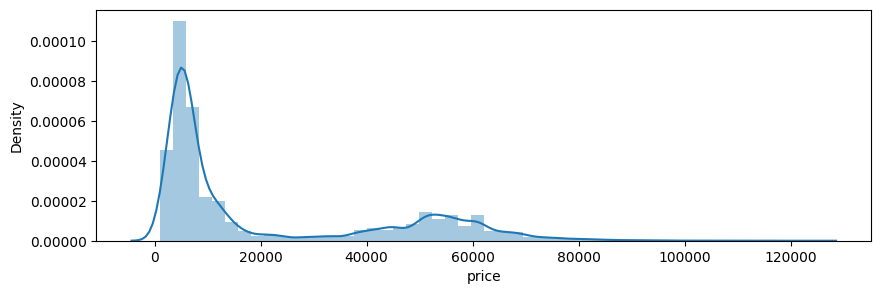

In [10]:
plt.figure(figsize=(10,3))
sns.distplot(df['price'])
plt.show()

**Checking relationship of Airline with Price**

<ipython-input-11-f952b5b696a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='airline',y='price',palette='rainbow')


<Axes: xlabel='airline', ylabel='price'>

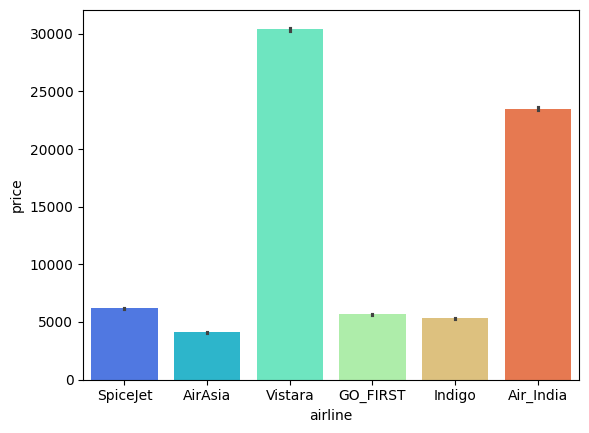

In [11]:
sns.barplot(df,x='airline',y='price',palette='rainbow')

**Checking relationship of source_city with Price**

<ipython-input-12-8fc43087deaa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='source_city',y='price',palette='rainbow')


<Axes: xlabel='source_city', ylabel='price'>

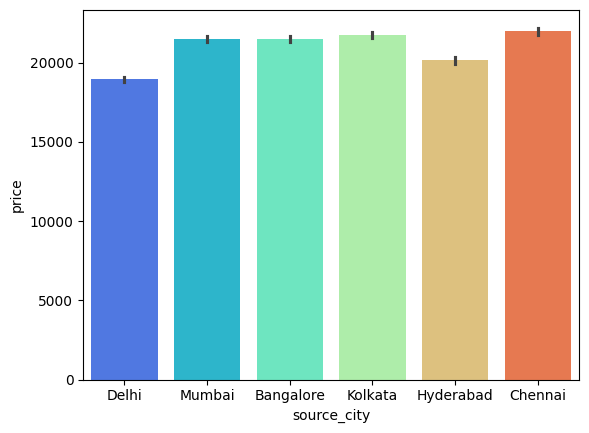

In [12]:
sns.barplot(df,x='source_city',y='price',palette='rainbow')

**Checking relationship of departure_time with Price**

<ipython-input-13-71f0dad94096>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='departure_time',y='price',palette='rainbow')


<Axes: xlabel='departure_time', ylabel='price'>

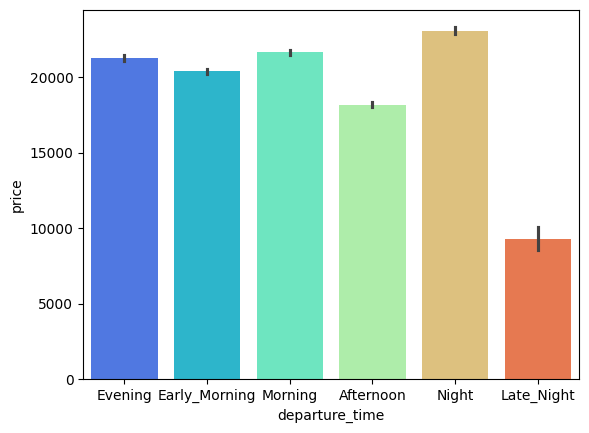

In [13]:
sns.barplot(df,x='departure_time',y='price',palette='rainbow')

**Checking relationship of stops with Price**

<ipython-input-14-e1336d5d6f52>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='stops',y='price',palette='rainbow')


<Axes: xlabel='stops', ylabel='price'>

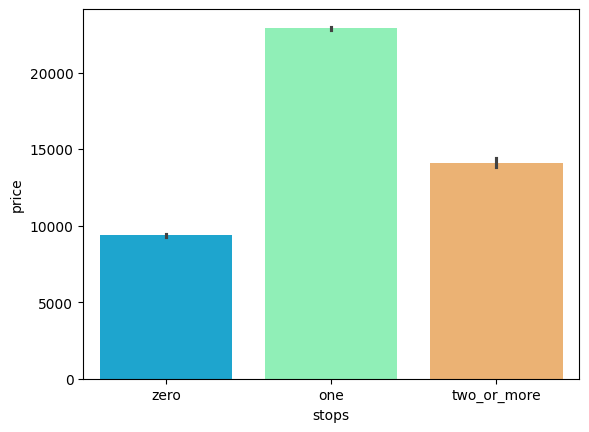

In [14]:
sns.barplot(df,x='stops',y='price',palette='rainbow')

**Checking relationship of arrival_time with Price**

<ipython-input-15-5341a506884b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='arrival_time',y='price',palette='rainbow')


<Axes: xlabel='arrival_time', ylabel='price'>

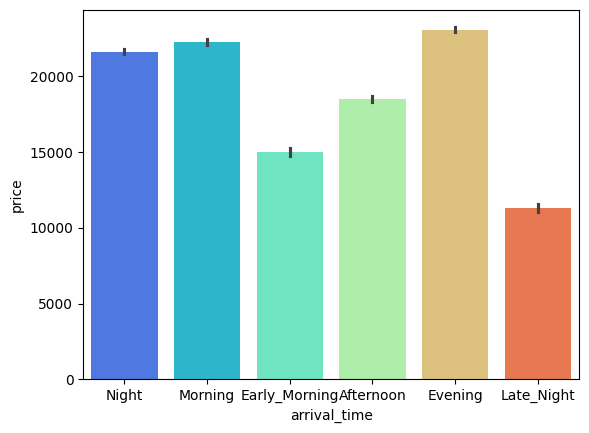

In [15]:
sns.barplot(df,x='arrival_time',y='price',palette='rainbow')

**Checking relationship of destination_city with Price**

<ipython-input-16-c4e981a25578>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='destination_city',y='price',palette='rainbow')


<Axes: xlabel='destination_city', ylabel='price'>

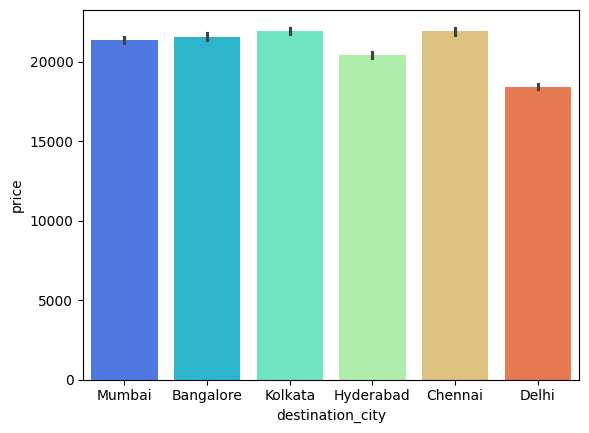

In [16]:
sns.barplot(df,x='destination_city',y='price',palette='rainbow')

**Checking relationship of class with Price**

<ipython-input-17-0f108d1a2811>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='class',y='price',palette='rainbow')


<Axes: xlabel='class', ylabel='price'>

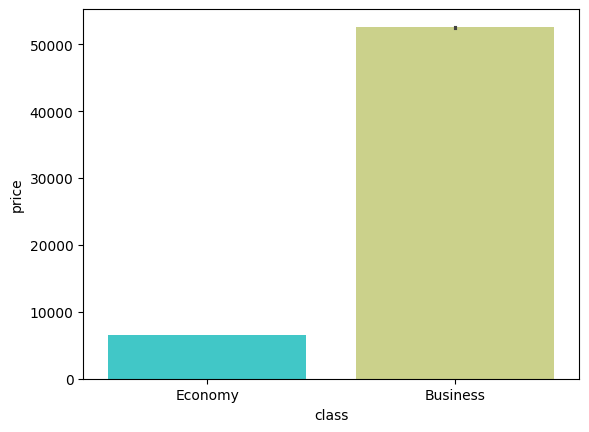

In [17]:
sns.barplot(df,x='class',y='price',palette='rainbow')

**Checking relationship of days_left with Price**

<ipython-input-18-5f4c23ce1b62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='days_left',y='price',palette='rainbow')


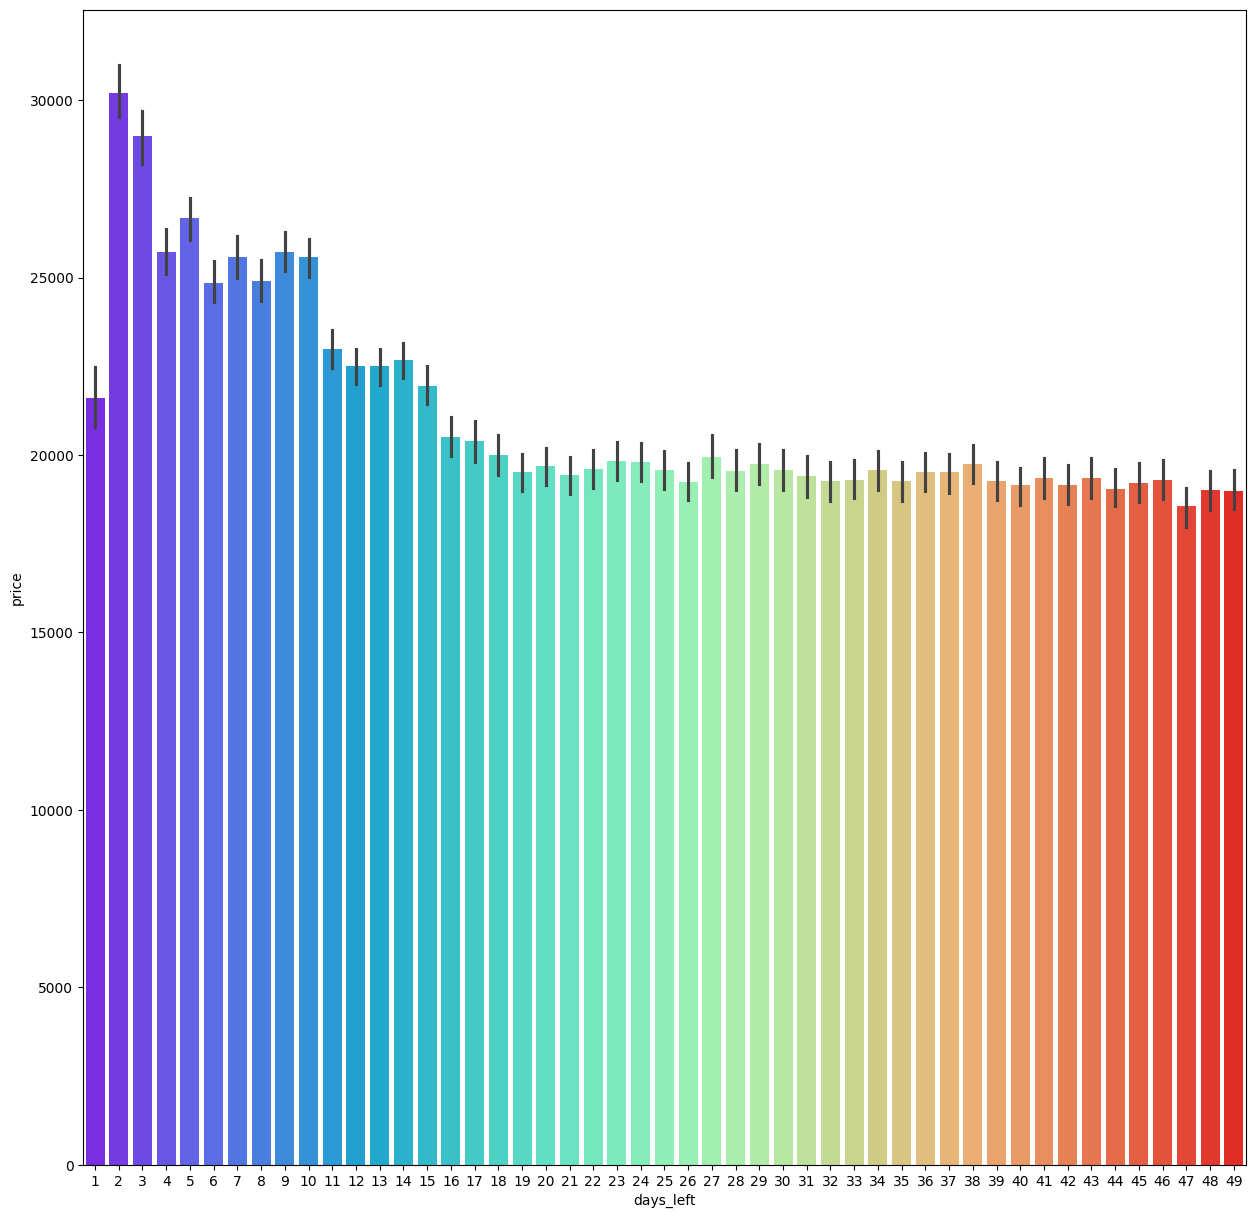

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(df,x='days_left',y='price',palette='rainbow')
plt.show()

**Checking relationship of duration with Price**

<Axes: xlabel='duration', ylabel='price'>

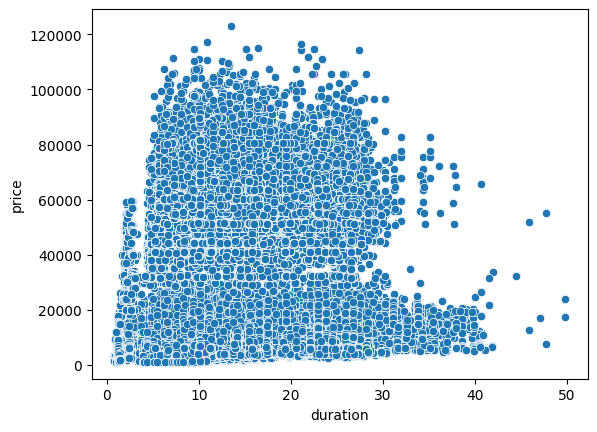

In [19]:
sns.scatterplot(df,x='duration',y='price')

**Dropping Unnecessary columns**

In [20]:
df=df.drop(columns=['Unnamed: 0','flight'])

In [21]:
df.shape

(300153, 10)

In [22]:
df.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
177852,Vistara,Hyderabad,Morning,two_or_more,Night,Chennai,Economy,9.25,20,9265
152793,Air_India,Hyderabad,Morning,zero,Afternoon,Delhi,Economy,2.50,5,6133
129826,GO_FIRST,Kolkata,Afternoon,one,Night,Mumbai,Economy,7.33,17,5790
102174,Vistara,Bangalore,Morning,one,Night,Mumbai,Economy,14.08,46,6568
11824,Air_India,Delhi,Afternoon,one,Evening,Bangalore,Economy,28.00,11,10680


**Extracting Training Data**

In [23]:
x=df.drop(['price'],axis=1)
x.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
180435,AirAsia,Hyderabad,Night,one,Morning,Chennai,Economy,10.25,49
251869,Vistara,Bangalore,Early_Morning,one,Evening,Mumbai,Business,9.67,38
226776,Vistara,Mumbai,Afternoon,one,Night,Delhi,Business,7.75,19
24975,SpiceJet,Delhi,Evening,one,Night,Kolkata,Economy,26.08,29
45014,GO_FIRST,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.17,13


In [24]:
x.shape

(300153, 9)

<ipython-input-25-6331f060aa40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


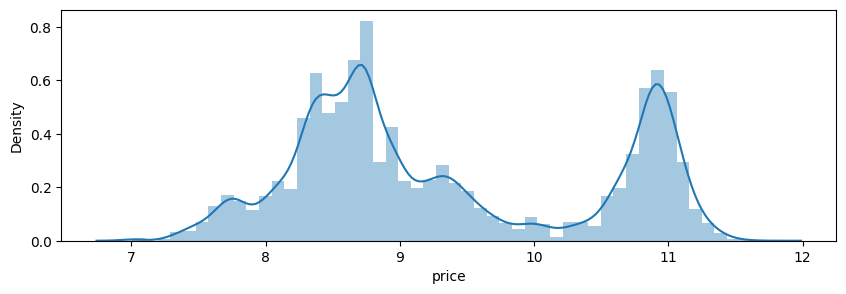

In [25]:
plt.figure(figsize=(10,3))
sns.distplot(np.log(df['price']))
plt.show()

In [26]:
y=pd.DataFrame(np.log(df['price']),columns=['price'])
y.head()

,price
0,8.691651
1,8.691651
2,8.692154
3,8.691986
4,8.691986


In [27]:
y.shape

(300153, 1)

**Applying Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

In [29]:
xtrain

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
154862,Vistara,Hyderabad,Evening,one,Night,Delhi,Economy,5.25,22
253148,Air_India,Bangalore,Early_Morning,one,Afternoon,Kolkata,Business,8.33,7
270966,Vistara,Kolkata,Afternoon,one,Morning,Hyderabad,Business,18.33,17
143014,Indigo,Kolkata,Night,zero,Late_Night,Hyderabad,Economy,2.17,7
54524,GO_FIRST,Mumbai,Morning,one,Night,Bangalore,Economy,13.58,12
...,...,...,...,...,...,...,...,...,...
130365,Vistara,Kolkata,Afternoon,one,Night,Mumbai,Economy,6.67,20
92303,SpiceJet,Bangalore,Evening,zero,Night,Delhi,Economy,2.75,41
6618,Indigo,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.17,34
90430,AirAsia,Bangalore,Evening,two_or_more,Late_Night,Delhi,Economy,8.75,33


In [30]:
xtrain.shape

(240122, 9)

In [31]:
ytrain.shape

(240122, 1)

In [32]:
xtest.shape

(60031, 9)

In [33]:
ytest.shape

(60031, 1)

#Detecting Outliers

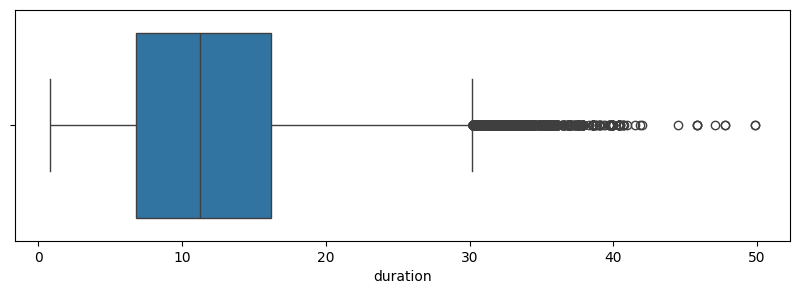

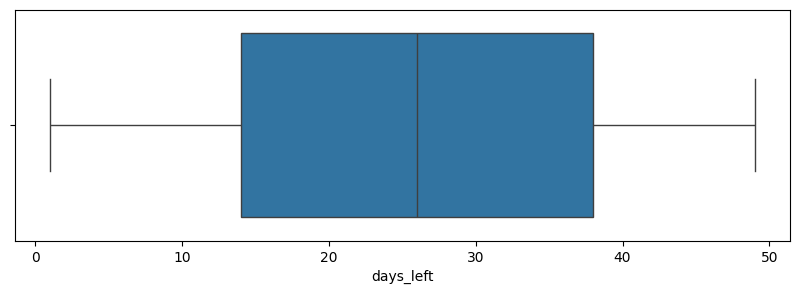

In [34]:
count=xtrain.select_dtypes(include=np.number)
for i in count:
  plt.figure(figsize=(10,3))
  sns.boxplot(xtrain,x=i)
  plt.show()

**Trimming**

In [35]:
percentile25=xtrain['duration'].quantile(0.25)
percentile75=xtrain['duration'].quantile(0.75)

print('percentile25 ',percentile25)
print('percentile75 ',percentile75)

iqr=float(percentile75)-float(percentile25)
upper_limit=int(percentile75+(1.5*iqr))
lower_limit=int(percentile25-(1.5*iqr))

print('upper_limit ',upper_limit)
print('lower_limit ',lower_limit)

new_xtrain = xtrain[xtrain['duration'] < upper_limit]


percentile25  6.83
percentile75  16.17
upper_limit  30
lower_limit  -7


<ipython-input-36-fb011d8c3e1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['duration'])
<ipython-input-36-fb011d8c3e1f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_xtrain['duration'])


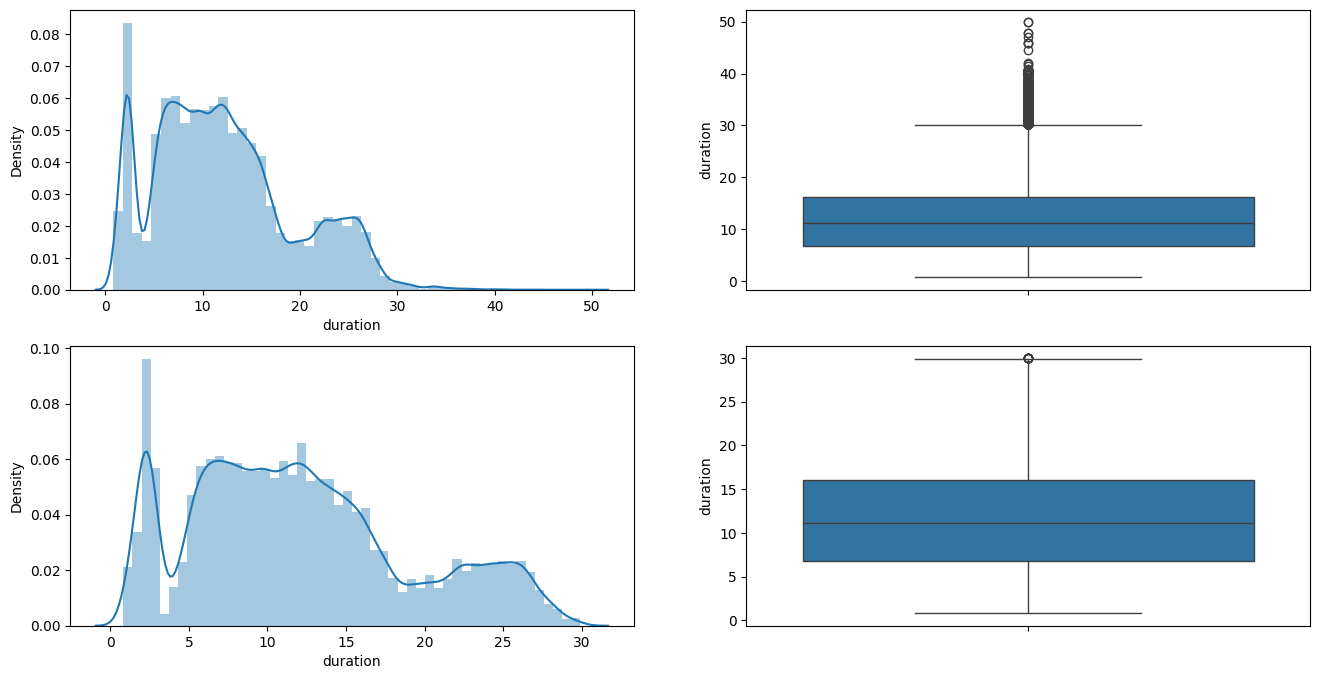

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(xtrain['duration'])

plt.subplot(2,2,2)
sns.boxplot(xtrain['duration'])

plt.subplot(2,2,3)
sns.distplot(new_xtrain['duration'])

plt.subplot(2,2,4)
sns.boxplot(new_xtrain['duration'])

plt.show()

**Capping**

In [37]:
xtrain_cap = xtrain.copy()

xtrain_cap['duration'] = np.where(
    xtrain_cap['duration'] > upper_limit,
    upper_limit,
    np.where(
        xtrain_cap['duration'] < lower_limit,
        lower_limit,
        xtrain_cap['duration']
    )
)

<ipython-input-38-a2664e65c990>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['duration'])
<ipython-input-38-a2664e65c990>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain_cap['duration'])


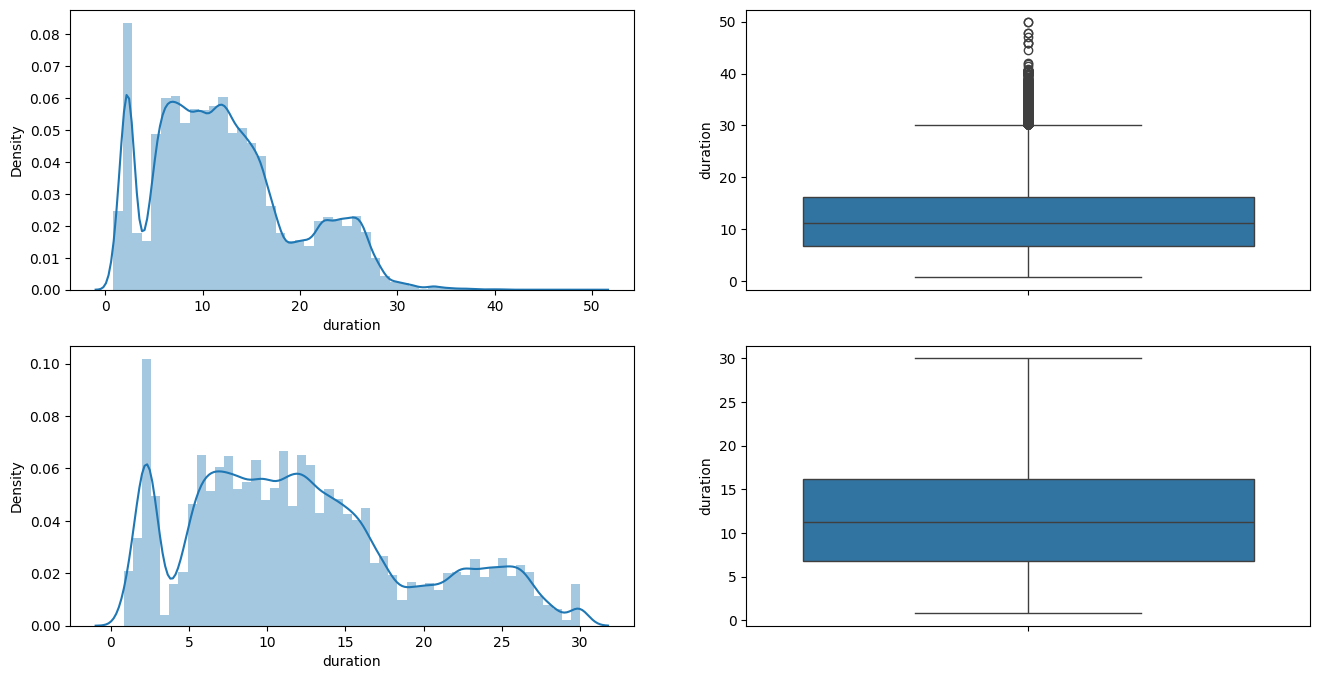

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(xtrain['duration'])

plt.subplot(2,2,2)
sns.boxplot(xtrain['duration'])

plt.subplot(2,2,3)
sns.distplot(xtrain_cap['duration'])

plt.subplot(2,2,4)
sns.boxplot(xtrain_cap['duration'])

plt.show()

In [39]:
xtrain['duration']=xtrain_cap['duration']


**Encoding categorical values to numeric**

In [40]:
xtrain_encoded = pd.get_dummies(xtrain,columns=['airline','source_city','destination_city','departure_time','arrival_time'], drop_first= True)
xtrain_encoded.sample(5)

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
93503,one,Economy,6.42,47,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
56140,one,Economy,18.75,20,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
268772,one,Business,12.42,25,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
194407,one,Economy,23.08,10,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
154939,one,Economy,10.75,23,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [41]:
xtrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240122 entries, 154862 to 29828
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         240122 non-null  object 
 1   class                         240122 non-null  object 
 2   duration                      240122 non-null  float64
 3   days_left                     240122 non-null  int64  
 4   airline_Air_India             240122 non-null  bool   
 5   airline_GO_FIRST              240122 non-null  bool   
 6   airline_Indigo                240122 non-null  bool   
 7   airline_SpiceJet              240122 non-null  bool   
 8   airline_Vistara               240122 non-null  bool   
 9   source_city_Chennai           240122 non-null  bool   
 10  source_city_Delhi             240122 non-null  bool   
 11  source_city_Hyderabad         240122 non-null  bool   
 12  source_city_Kolkata           240122 non-null

In [42]:
bool_cols = xtrain_encoded.select_dtypes(include='bool')

for col in bool_cols:
  xtrain_encoded[col] = xtrain_encoded[col].astype(int)

In [43]:
xtrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240122 entries, 154862 to 29828
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         240122 non-null  object 
 1   class                         240122 non-null  object 
 2   duration                      240122 non-null  float64
 3   days_left                     240122 non-null  int64  
 4   airline_Air_India             240122 non-null  int64  
 5   airline_GO_FIRST              240122 non-null  int64  
 6   airline_Indigo                240122 non-null  int64  
 7   airline_SpiceJet              240122 non-null  int64  
 8   airline_Vistara               240122 non-null  int64  
 9   source_city_Chennai           240122 non-null  int64  
 10  source_city_Delhi             240122 non-null  int64  
 11  source_city_Hyderabad         240122 non-null  int64  
 12  source_city_Kolkata           240122 non-null

In [44]:
xtrain_encoded.sample(5)

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
18620,one,Economy,9.08,43,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
158793,one,Economy,18.42,4,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
147674,one,Economy,27.08,46,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
94104,one,Economy,5.58,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
271255,one,Business,6.75,23,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [45]:
xtrain_encoded['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [46]:
xtrain_encoded['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [47]:
xtrain_encoded.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

In [48]:
xtrain_encoded.replace({"Economy": 0, "Business": 1}, inplace = True)

In [49]:
xtrain_encoded

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
154862,1,0,5.25,22,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
253148,1,1,8.33,7,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
270966,1,1,18.33,17,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
143014,0,0,2.17,7,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
54524,1,0,13.58,12,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,1,0,6.67,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
92303,0,0,2.75,41,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
6618,0,0,2.17,34,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
90430,2,0,8.75,33,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#Applying Normalization Technique

In [50]:
std=StandardScaler()
std.fit(xtrain_encoded)
xtrain_std_data = std.transform(xtrain_encoded)

In [51]:
xtrain_df=pd.DataFrame(xtrain_std_data,columns=xtrain_encoded.columns)

#TestSet

In [52]:
xtest_encoded = pd.get_dummies(xtest,columns=['airline','source_city','destination_city','departure_time','arrival_time'], drop_first= True)
xtest_encoded.sample(5)

bool_cols = xtest_encoded.select_dtypes(include='bool')

for col in bool_cols:
  xtest_encoded[col] = xtest_encoded[col].astype(int)

xtest_encoded.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

xtest_encoded.replace({"Economy": 0, "Business": 1}, inplace = True)

xtest_std_data = std.transform(xtest_encoded)

xtest_df=pd.DataFrame(xtest_std_data,columns=xtest_encoded.columns)

#Building and Evaluating Regression Models

#LinearRegression

In [53]:
lr_model = LinearRegression()
lr_model.fit(xtrain_df, ytrain)
y_pred_lr=lr_model.predict(xtest_df)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, y_pred_lr))
print('MSE:', metrics.mean_squared_error(ytest, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_lr)))
print('R2-score:', metrics.r2_score(ytest, y_pred_lr))

MAE: 0.25522892412654175
MSE: 0.10573458529660221
RMSE: 0.3251685490581803
R2-score: 0.9144235789464599


#DecisionTreeRegressor

In [55]:
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain_df, ytrain)
y_pred_dt=dt_model.predict(xtest_df)

In [56]:
print('MAE:', metrics.mean_absolute_error(ytest, y_pred_dt))
print('MSE:', metrics.mean_squared_error(ytest, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_dt)))
print('R2-score:', np.sqrt(metrics.r2_score(ytest, y_pred_dt)))

MAE: 0.06984018704075572
MSE: 0.029533402288362088
RMSE: 0.17185285068442155
R2-score: 0.9879762665699899


#RandomForestRegression

In [57]:
rf_model = RandomForestRegressor()
rf_model.fit(xtrain_df, ytrain)
y_pred_rf=rf_model.predict(xtest_df)

<ipython-input-57-4ae82a5971d3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(xtrain_df, ytrain)


In [58]:
print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rf))
print('MSE:', metrics.mean_squared_error(ytest, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_rf)))
print('R2-score:', np.sqrt(metrics.r2_score(ytest, y_pred_rf)))

MAE: 0.06551338511492621
MSE: 0.018054013287307744
RMSE: 0.1343652235041037
R2-score: 0.9926670949466706


#K-Nearest Neighbors(KNN)

In [59]:
scaler=MinMaxScaler()
scaler.fit(xtrain_encoded)
xtrain_normalized_data = scaler.transform(xtrain_encoded)
xtest_normalized_data = scaler.transform(xtest_encoded)

In [60]:
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain_normalized_data, ytrain)
knn_predictions = knn_model.predict(xtest_normalized_data)

In [61]:
print('MAE:', metrics.mean_absolute_error(ytest, knn_predictions))
print('MSE:', metrics.mean_squared_error(ytest, knn_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, knn_predictions)))
print('R2-score:', metrics.r2_score(ytest, knn_predictions))

MAE: 0.10767406441957403
MSE: 0.03266376677847302
RMSE: 0.18073120034590878
R2-score: 0.9735635388251808


#Saving the model

In [68]:
import joblib

joblib.dump(rf_model, "/content/drive/MyDrive/MachineLearning Project/FlightPricePrediction_model.pkl")

loaded_model = joblib.load("/content/drive/MyDrive/MachineLearning Project/FlightPricePrediction_model.pkl")

In [76]:
joblib.dump(rf_model, "/content/drive/MyDrive/MachineLearning Project/FlightPricePrediction_df.pkl")

['/content/drive/MyDrive/MachineLearning Project/FlightPricePrediction_df.pkl']

In [71]:
y_prediction = loaded_model.predict(xtest_df)

In [72]:
metrics.r2_score(ytest, y_prediction)

0.9853879613898623